In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import math

In [31]:
initializer = tf.keras.initializers.glorot_normal()


encoder_input = tf.keras.Input(shape=(2))
x = layers.Dense(64, activation="tanh", kernel_initializer=initializer)(encoder_input)
x = layers.Dense(64, activation="tanh",kernel_initializer=initializer)(x)
x = layers.Dense(64, activation="tanh",kernel_initializer=initializer)(x)
x = layers.Dense(64, activation="tanh",kernel_initializer=initializer)(x)
#x = layers.Dense(16, activation="tanh",kernel_initializer=initializer)(x)
encoder_output = layers.Dense(1)(x)

In [32]:
model = tf.keras.Model(encoder_input, encoder_output, name="encoder")
model.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 12,737
Trainable params: 12,737
Non-trainable params: 0
_______________________________________________________

In [33]:
def bounday_fct(x):
    return np.sin(x*(np.pi))
N=100
#model.load_weights('checkpoints/lap_energy.h5')
#model = tf.keras.models.load_model('checkpoints/lap_variational_almost.h5')
x_len = np.linspace(0,1,N).reshape((N,1))
x_grid = np.meshgrid(x_len,x_len)
xx, yy = np.meshgrid(x_len, x_len)


#x_len = tf.convert_to_tensor(x_len)
#model_loss = pde_fluct
x_tensor = tf.convert_to_tensor(np.c_[xx.ravel(), yy.ravel()], dtype=tf.float32)


start = 1

for step in range(0,25000):

# Open a GradientTape to record the operations run
# during the forward pass, which enables auto-differentiation.
    with tf.GradientTape(persistent=True) as tape:

        # Create tensor that you will watch
        # f = -1
        tape.watch(x_tensor)
        # Feed forward
        #boundary = np.outer(bounday_fct(x_span),bounday_fct(y_span))
        #unc_values = model.predict(np.c_[xx.ravel(), yy.ravel()])
        output = model(x_tensor, training=True)
        #output = output.reshape
        #print(output.shape)
        y_x = tape.gradient(output,x_tensor)
        y_xx = tape.gradient(y_x,x_tensor)
        #print(y_x**2)

        # Gradient and the corresponding loss function
        #o_x = tape.gradient(output, x_tensor)
        loss_direct = (tf.reduce_mean(input_tensor=(y_xx + 1)**2)
                      #+ 100*tf.square(y_x[0]-1)
                      + 10*tf.square(output[0])
                      #+ 100*tf.square(output[0]-output[-1])
                      )
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00095)
    if True:
        #print('strasight train')
        mode ='direct'
        #print(loss_direct)
        grads_d = tape.gradient(loss_direct, model.trainable_weights)
        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads_d, model.trainable_weights))
    else:
        print()

    best_loss = 100
    # Log every 200 batches
    if step % 100 == 0:
        print(
            "Training loss at step:",
            step, float(loss_direct)
        )
        if False:#best_loss < float(loss_direct):
            model.save_weights('checkpoints/lap_energy_best.h5')
            best_loss = float(loss_direct)

            #plt.plot(x_len, model(x_len))
            #plt.plot(x_len, np.exp(x_len))

Training loss at step: 0 1.1131027936935425
Training loss at step: 100 0.04107971489429474
Training loss at step: 200 0.03926973417401314
Training loss at step: 300 0.03515873849391937
Training loss at step: 400 0.020736154168844223
Training loss at step: 500 0.017284903675317764
Training loss at step: 600 0.016642780974507332
Training loss at step: 700 0.016110673546791077
Training loss at step: 800 0.015624376013875008
Training loss at step: 900 0.015431676059961319
Training loss at step: 1000 0.015239040367305279
Training loss at step: 1100 0.015178765170276165
Training loss at step: 1200 0.015056127682328224
Training loss at step: 1300 0.014815926551818848
Training loss at step: 1400 0.01465004961937666
Training loss at step: 1500 0.014463786967098713
Training loss at step: 1600 0.014392977580428123
Training loss at step: 1700 0.014171799644827843
Training loss at step: 1800 0.014488471671938896
Training loss at step: 1900 0.014337439090013504
Training loss at step: 2000 0.01346253

KeyboardInterrupt: 

In [34]:
model.summary()
model.save('checkpoints2d/quad_pinn_tanh_basic64.h5')

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 12,737
Trainable params: 12,737
Non-trainable params: 0
_______________________________________________________

50
(50, 50)
(2500, 1)


(<Figure size 432x288 with 2 Axes>, <Axes3DSubplot:>)

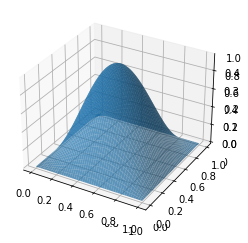

In [35]:
#model = tf.keras.models.load_model('checkpoints2d/quad_pinn_relu_sine_bound.h5')

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def bounday_fct(x):
    return np.sin(x*(np.pi))

def plot_decision_boundary(model, steps=50, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    #steps = 1000
    x_span = np.linspace(0, 1, steps)
    print(len(x_span))
    y_span = np.linspace(0, 1, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    boundary = np.outer(bounday_fct(x_span),bounday_fct(y_span))
    print(boundary.shape)
    # Make predictions across region of interest
    func_values = model.predict(np.c_[xx.ravel(), yy.ravel()])#*\
             #
    print(func_values.shape)
    # Plot decision boundary in region of interest
    z = func_values.reshape(xx.shape)*boundary

    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(xx, yy, z, alpha=0.7)
    # contourf

    # Get predicted labels on training data and plot
    #ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

plot_decision_boundary(model)

In [ ]:
x_len = np.linspace(-1,2,1000).reshape((1000,1))
plt.plot(x_len, model(x_len))
plt.plot(x_len, np.exp(x_len))
